What is the most optimal skill to learn for Data Analysts?

Methodology 
   1. Group skills to determine median salary and lkehood of being in posting
   2. Visualize median salary vs percent skill demand 
   3. Determine if certain technologies are moe prevalent

In [32]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [35]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country']=='United Kingdom')].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,None,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,None,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,None,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,None,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e..."
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,None,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'..."
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."


In [36]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_Exploded = df_DA_US.explode('job_skills')
df_DA_US_Exploded[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql
...,...,...
781263,75000.0,sql
781263,75000.0,python
781263,75000.0,scala
781263,75000.0,databricks


In [37]:
df_DA_UK = df_DA_UK.dropna(subset='salary_year_avg')
df_DA_UK_Exploded = df_DA_UK.explode('job_skills')
df_DA_UK_Exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
25994,105000.0,go
25994,105000.0,gdpr
25994,105000.0,dax
84680,105000.0,sql
98784,100500.0,sql


In [38]:
df_DA_US_skills = df_DA_US_Exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_US_skills = df_DA_US_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_DA_US_skills

,skill_count,median_salary
job_skills,,
sql,714,87500.0
excel,472,77500.0
python,408,90000.0
tableau,398,90000.0
power bi,279,87500.0
...,...,...
sqlite,1,77500.0
theano,1,100000.0
typescript,1,65000.0


In [39]:
df_DA_UK_skills = df_DA_UK_Exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_UK_skills = df_DA_UK_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [40]:
df_DA_US_skills

,skill_count,median_salary
job_skills,,
sql,714,87500.0
excel,472,77500.0
python,408,90000.0
tableau,398,90000.0
power bi,279,87500.0
...,...,...
sqlite,1,77500.0
theano,1,100000.0
typescript,1,65000.0


In [41]:
DA_job_count_us = (len(df_DA_US))
DA_job_count_uk = (len(df_DA_UK))

In [42]:
df_DA_US_skills['skills percent'] = df_DA_US_skills['skill_count'] / DA_job_count_us *100

df_DA_US_skills

,skill_count,median_salary,skills percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
...,...,...,...
sqlite,1,77500.0,0.089445
theano,1,100000.0,0.089445
typescript,1,65000.0,0.089445


In [71]:
df_DA_UK_skills['skills percent'] = df_DA_UK_skills['skill_count'] / DA_job_count_uk *100

df_DA_UK_skills.head(12)

,skill_count,median_salary,skills percent
job_skills,,,
sql,10,99500.00,62.50
excel,5,100500.00,31.25
python,4,65015.75,25.00
tableau,4,99500.00,25.00
sas,2,51014.00,12.50
gcp,1,53014.00,6.25
bigquery,1,98500.00,6.25
dax,1,105000.00,6.25
express,1,53014.00,6.25


In [75]:
skill_percent = 5

df_DA_US_HighDemand = df_DA_US_skills[df_DA_US_skills['skills percent'] > skill_percent].head(12)

df_DA_US_HighDemand

,skill_count,median_salary,skills percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


In [76]:
df_DA_UK_HighDemand = df_DA_UK_skills[df_DA_UK_skills['skills percent'] > skill_percent].head(12)

df_DA_UK_HighDemand

,skill_count,median_salary,skills percent
job_skills,,,
sql,10,99500.00,62.50
excel,5,100500.00,31.25
python,4,65015.75,25.00
tableau,4,99500.00,25.00
sas,2,51014.00,12.50
gcp,1,53014.00,6.25
bigquery,1,98500.00,6.25
dax,1,105000.00,6.25
express,1,53014.00,6.25


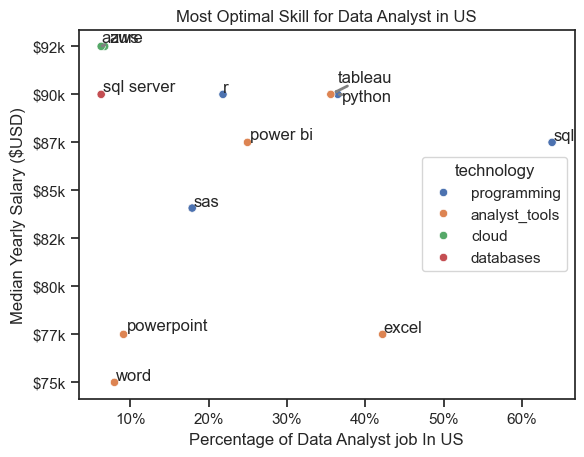

In [69]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.set_theme(style='ticks')

# df_plot_US.plot(kind='scatter', x='skills percent', y='median_salary')
sns.scatterplot(
    data=df_plot_US,
    x='skills percent',
    y='median_salary',
    hue='technology'
)


texts = []
for i,text in enumerate(df_DA_US_HighDemand.index):
    texts.append(plt.text(df_DA_US_HighDemand['skills percent'].iloc[i], df_DA_US_HighDemand['median_salary'].iloc[i], text))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percentage of Data Analyst job In US')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skill for Data Analyst in US')

plt.show()

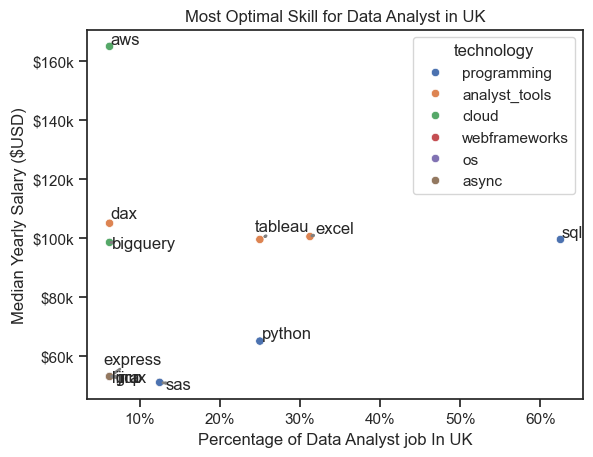

In [79]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.set_theme(style='ticks')

# df_plot_US.plot(kind='scatter', x='skills percent', y='median_salary')
sns.scatterplot(
    data=df_plot_UK,
    x='skills percent',
    y='median_salary',
    hue='technology'
)


texts = []
for i,text in enumerate(df_DA_UK_HighDemand.index):
    texts.append(plt.text(df_DA_UK_HighDemand['skills percent'].iloc[i], df_DA_UK_HighDemand['median_salary'].iloc[i], text))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percentage of Data Analyst job In UK')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skill for Data Analyst in UK')

plt.show()

In [52]:
df_tech = df['job_type_skills'].copy()

df_tech = df_tech.drop_duplicates()

df_tech = df_tech.dropna()

tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] +=value
        else:
            tech_dict[key] = value
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict

{'analyst_tools': ['powerpoint',
  'sharepoint',
  'powerbi',
  'cognos',
  'sheets',
  'ssis',
  'power bi',
  'msaccess',
  'esquisse',
  'sas',
  'qlik',
  'word',
  'spss',
  'alteryx',
  'spreadsheet',
  'ms access',
  'microstrategy',
  'splunk',
  'excel',
  'tableau',
  'ssrs',
  'outlook',
  'visio',
  'dax',
  'datarobot',
  'sap',
  'looker',
  'nuix'],
 'programming': ['java',
  'mongodb',
  'perl',
  'cobol',
  'php',
  'lua',
  'python',
  'c#',
  'c++',
  'vba',
  'powershell',
  'shell',
  'golang',
  'javascript',
  'groovy',
  'haskell',
  'css',
  'nosql',
  'sql',
  'ruby',
  'apl',
  'elixir',
  'bash',
  'sas',
  'clojure',
  'delphi',
  'swift',
  't-sql',
  'solidity',
  'erlang',
  'visual basic',
  'julia',
  'vb.net',
  'c',
  'sass',
  'html',
  'matlab',
  'kotlin',
  'lisp',
  'pascal',
  'rust',
  'ocaml',
  'assembly',
  'visualbasic',
  'f#',
  'typescript',
  'objective-c',
  'mongo',
  'no-sql',
  'r',
  'dart',
  'go',
  'scala',
  'crystal',
  'fort

In [55]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,sharepoint
0,analyst_tools,powerbi
0,analyst_tools,cognos
0,analyst_tools,sheets
...,...,...
9,sync,unify
9,sync,google chat
9,sync,rocketchat
9,sync,wire


In [67]:
df_plot_US = df_DA_US_HighDemand.merge(df_tech, left_on='job_skills', right_on='skills')

In [77]:
df_plot_UK = df_DA_UK_HighDemand.merge(df_tech, left_on='job_skills', right_on='skills')